In [269]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import time
import os
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import shap
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import (
    mean_squared_error,       # MSE
    mean_absolute_error,      # MAE
    r2_score,                 # R² Score (coefficient of determination)
    mean_absolute_percentage_error,  # MAPE
    mean_squared_log_error    # MSLE
)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [270]:
df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")
print(df.columns.tolist())


C:\Users\abhau\AppData\Local\Temp\ipykernel_20024\2141111860.py:1: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")


['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date', 'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out', 'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens', 'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y', 'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz', 'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2', 'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive', 'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay', 'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2', 'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', 'fantasy_score_batting', 'fantasy_score_bowling', 'fantasy_score_total']


In [271]:
df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv", low_memory=False)

df = df.drop(columns=[
    'batting_style', 'bowling_style', 'full_name', 'playing_role',
    'key_cricinfo_3', 'key_cricketarchive_2', 'key_opta_2', 'key_crichq',
    'key_bcci_2', 'key_cricheroes', 'key_nvplay_2', 'key_cricinfo_2',
    'key_pulse_2', 'key_cricbuzz', 'key_opta', 'key_cricketworld',
    'key_cricingif', 'key_bcci', 'key_bigbash', 'key_nvplay',
    'key_pulse', 'key_cricketarchive', 'key_cricinfo'
])  # Removing empty columns
df['all_rounder_score'] = (df['runs_scored']/90 + df['wickets_taken']*0.35)*20
df['fielding'] = (df['catches_taken'] * 5 + df['run_out_throw'] * 15 + df['run_out_direct'] * 4)
df['impact'] = (df['runs_scored'] - df['balls_faced'] + df['fours_scored']*2.5 + df['sixes_scored']*4)/9
df['impact2'] = (df['wickets_taken']*3 + df['dot_balls_as_bowler']*0.9 - df['runs_conceded']*1.4)

#Encoding every caterogica
df['player_id']= label_encoder.fit_transform(df['player_id'])

label_encoder = LabelEncoder()

df['player_id'] = label_encoder.fit_transform(df['player_id'].fillna("Unknown"))
df['match_type'] = df['match_type'].fillna("Unknown")
df = pd.get_dummies(df, columns = ['match_type'], drop_first = True, dtype=int)

df['player_team'] = label_encoder.fit_transform(df['player_team'].fillna("Unknown"))
df['opposition_team'] = label_encoder.fit_transform(df['opposition_team'].fillna("Unknown"))
df['name_x'] = label_encoder.fit_transform(df['name_x'].fillna("Unknown"))

df

,player_id,match_id,gender,balls_per_over,start_date,series_name,name_x,runs_scored,player_out,balls_faced,...,fantasy_score_total,all_rounder_score,fielding,impact,impact2,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test
0,922,1158348,female,6,21-08-2018,Botswana Cricket Association Women's T20I Series,6156,10,1,30,...,17,2.222222,5,-1.944444,0.0,0,0,0,1,0
1,922,1182644,female,6,05-05-2019,ICC Women's T20 World Cup Africa Region Qualifier,6156,8,1,18,...,7,1.777778,0,-0.833333,0.0,0,0,0,1,0
2,922,1275107,female,6,09-09-2021,ICC Women's T20 World Cup Africa Region Qualifier,6156,1,0,5,...,5,0.222222,0,-0.444444,0.0,0,0,0,1,0
3,922,1275113,female,6,15-09-2021,ICC Women's T20 World Cup Africa Region Qualifier,6156,0,0,0,...,4,0.000000,0,0.000000,0.0,0,0,0,1,0
4,922,1275125,female,6,14-09-2021,ICC Women's T20 World Cup Africa Region Qualifier,6156,1,1,15,...,-1,0.222222,0,-1.555556,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,11770,1473475,male,6,20-04-2025,Indian Premier League,7528,0,0,0,...,4,0.000000,0,0.000000,0.0,0,0,0,1,0
416708,11770,1473478,male,6,23-04-2025,Indian Premier League,7528,0,0,0,...,12,0.000000,5,0.000000,0.0,0,0,0,1,0
416709,11770,1473482,male,6,27-04-2025,Indian Premier League,7528,25,0,13,...,49,5.555556,5,2.777778,0.0,0,0,0,1,0
416710,11770,1473487,male,6,01-05-2025,Indian Premier League,7528,0,0,0,...,4,0.000000,0,0.000000,0.0,0,0,0,1,0


In [272]:
print(df.columns.tolist())


['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date', 'series_name', 'name_x', 'runs_scored', 'player_out', 'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens', 'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y', 'unique_name', 'teams', 'fantasy_score_batting', 'fantasy_score_bowling', 'fantasy_score_total', 'all_rounder_score', 'fielding', 'impact', 'impact2', 'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test']


In [273]:
def split(df,date):
    train = df[df['start_date']< pd.to_datetime(date)]
    test = df[df['start_date']>= pd.to_datetime(date)]
    return train,test

df['start_date'] = pd.to_datetime(df['start_date'])
df_train, df_test = split(df, pd.to_datetime('2024-10-01'))

df_train.sort_values(by='start_date', inplace=True)
df_test.sort_values(by='start_date', inplace=True)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

C:\Users\abhau\AppData\Local\Temp\ipykernel_20024\1962868021.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['start_date'] = pd.to_datetime(df['start_date'])
C:\Users\abhau\AppData\Local\Temp\ipykernel_20024\1962868021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values(by='start_date', inplace=True)
C:\Users\abhau\AppData\Local\Temp\ipykernel_20024\1962868021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.sort_values(by='start_date', inplace=True)


In [274]:
def rolling_stats(group):
    group = group.sort_values('start_date')

    balls_faced = group['balls_faced'].replace(0, np.nan).astype(float)
    balls_bowled = group['balls_bowled'].replace(0, np.nan).astype(float)

    group['SR_match'] = (group['runs_scored'] / balls_faced) * 100
    group['ECO_match'] = group['runs_conceded'] / (balls_bowled / 6)

    group['SR_match'] = group['SR_match'].replace([np.inf, -np.inf], np.nan).clip(upper=300).fillna(0)
    group['ECO_match'] = group['ECO_match'].replace([np.inf, -np.inf], np.nan).clip(upper=20).fillna(0)

    # EWM stats
    group['strike_rate_1'] = group['SR_match'].shift(1).ewm(span=1, adjust=False).mean()
    group['strike_rate_5'] = group['SR_match'].shift(1).ewm(span=5, adjust=False).mean()
    group['strike_rate_10'] = group['SR_match'].shift(1).ewm(span=10, adjust=False).mean()

    group['economy_rate_1'] = group['ECO_match'].shift(1).ewm(span=1, adjust=False).mean()
    group['economy_rate_5'] = group['ECO_match'].shift(1).ewm(span=5, adjust=False).mean()
    group['economy_rate_10'] = group['ECO_match'].shift(1).ewm(span=10, adjust=False).mean()

    group['fours_1'] = group['fours_scored'].shift(1).ewm(span=1, adjust=False).mean()
    group['fours_5'] = group['fours_scored'].shift(1).ewm(span=5, adjust=False).mean()
    group['fours_10'] = group['fours_scored'].shift(1).ewm(span=10, adjust=False).mean()

    group['sixes_1'] = group['sixes_scored'].shift(1).ewm(span=1, adjust=False).mean()
    group['sixes_5'] = group['sixes_scored'].shift(1).ewm(span=5, adjust=False).mean()
    group['sixes_10'] = group['sixes_scored'].shift(1).ewm(span=10, adjust=False).mean()

    group['AR_1'] = group['all_rounder_score'].shift(1).ewm(span=1, adjust=False).mean() * 10
    group['AR_5'] = group['all_rounder_score'].shift(1).ewm(span=5, adjust=False).mean() * 10
    group['AR_10'] = group['all_rounder_score'].shift(1).ewm(span=10, adjust=False).mean() * 10

    # Batting points
    group['batting_points'] = (
        group['runs_scored'].fillna(0) +
        group['fours_scored'].fillna(0) * 2 +
        group['sixes_scored'].fillna(0) * 4
    )

    overs = balls_bowled / 6
    group['bowling_points'] = (
        group['wickets_taken'].fillna(0) * 45 -
        2 * group['runs_conceded'].fillna(0) / overs.replace(0, np.nan)
    ).fillna(0)

    group['batting_points_1'] = group['batting_points'].shift(1).ewm(span=1, adjust=False).mean()
    group['batting_points_5'] = group['batting_points'].shift(1).ewm(span=5, adjust=False).mean()
    group['batting_points_10'] = group['batting_points'].shift(1).ewm(span=10, adjust=False).mean()

    group['bowling_points_1'] = group['bowling_points'].shift(1).ewm(span=1, adjust=False).mean()
    group['bowling_points_5'] = group['bowling_points'].shift(1).ewm(span=5, adjust=False).mean()
    group['bowling_points_10'] = group['bowling_points'].shift(1).ewm(span=10, adjust=False).mean()

    group['fantasy_1'] = group['fantasy_score_total'].shift(1).ewm(span=1, adjust=False).mean() * 1.3
    group['fantasy_5'] = group['fantasy_score_total'].shift(1).ewm(span=5, adjust=False).mean() * 1.2
    group['fantasy_10'] = group['fantasy_score_total'].shift(1).ewm(span=10, adjust=False).mean()

    group['runs_scored_5'] = group['runs_scored'].shift(1).ewm(span=5, adjust=False).mean()
    group['runs_scored_10'] = group['runs_scored'].shift(1).ewm(span=10, adjust=False).mean()

    group['wickets_taken_5'] = group['wickets_taken'].shift(1).ewm(span=5, adjust=False).mean()
    group['wickets_taken_10'] = group['wickets_taken'].shift(1).ewm(span=10, adjust=False).mean()

    return group

def player_features(data):
    feature_data = []

    for player_id, group in data.groupby(['player_id']):

        group = group.sort_values('start_date')
        group = rolling_stats(group)
        feature_data.append(group)

    result_df = pd.concat(feature_data)
    final_result_df = result_df.reset_index(drop=True)

    return result_df[['player_id', 'match_type', 'start_date', 'fantasy_1', 'fantasy_5', 'fantasy_10',
        'strike_rate_1', 'strike_rate_5', 'strike_rate_10', 'fours_1', 'fours_5', 'fours_10',
        'sixes_1', 'sixes_5', 'sixes_10','batting_points_1', 'batting_points_5', 'batting_points_10',
        'economy_rate_1', 'economy_rate_5', 'economy_rate_10','bowling_points_1', 'bowling_points_5', 'bowling_points_10',
        'AR_1', 'AR_5', 'AR_10','runs_scored_5', 'runs_scored_10','wickets_taken_5', 'wickets_taken_10']]


In [275]:
def get_features_all_players(df):
    df_feat = rolling_stats(df)

    # Clean up infs/NaNs
    df_feat.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_feat.fillna(0, inplace=True)

    # Detect one-hot encoded match_type columns
    match_type_cols = [col for col in df_feat.columns if col.startswith("match_type_")]

    return df_feat[
        ['name_x', 'player_id', 'start_date',
         'strike_rate_1', 'strike_rate_5', 'strike_rate_10',
         'economy_rate_1', 'economy_rate_5', 'economy_rate_10',
         'fours_1', 'fours_5', 'fours_10', 'sixes_1', 'sixes_5', 'sixes_10',
         'batting_points_1', 'batting_points_5', 'batting_points_10',
         'bowling_points_1', 'bowling_points_5', 'bowling_points_10',
         'AR_1', 'AR_5', 'AR_10','fantasy_1', 'fantasy_5', 'fantasy_10', 'fantasy_score_total',
         'player_team', 'opposition_team','runs_scored_5', 'runs_scored_10',
         'wickets_taken_5', 'wickets_taken_10']
        + match_type_cols
    ].reset_index(drop=True)


In [287]:
df_train_features = get_features_all_players(df_train)
df_test_features = get_features_all_players(df_test)


In [277]:


# 1. Replace 0 with NaN for avoiding infinite while dividing
df['balls_faced'] = df['balls_faced'].replace(0, np.nan)
df['balls_bowled'] = df['balls_bowled'].replace(0, np.nan)

# 2. Fill NaNs and infs in `df_test_features` with 0
df_test_features.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test_features.fillna(0, inplace=True)

# 3. Convert 'start_date' to datetime in both DataFrames
df_train_features['start_date'] = pd.to_datetime(df_train_features['start_date'])
df_test_features['start_date'] = pd.to_datetime(df_test_features['start_date'])

# 4. Sort both by date (oldest to newest)
df_train_features.sort_values(by='start_date', inplace=True)
df_test_features.sort_values(by='start_date', inplace=True)

In [278]:
df_train_features

,name_x,player_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,fours_1,...,opposition_team,runs_scored_5,runs_scored_10,wickets_taken_5,wickets_taken_10,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test
0,183,526,2001-12-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,92,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1
20,6528,10066,2001-12-19,0.000000,31.533748,36.809687,0.000000,1.073509,1.234888,0.0,...,130,34.995846,34.797134,0.018340,0.167194,0,0,0,0,1
19,8627,9624,2001-12-19,46.376812,47.300622,44.989617,0.000000,1.610263,1.509307,8.0,...,130,52.493769,42.529831,0.027510,0.204348,0,0,0,0,1
18,6655,5034,2001-12-19,45.454545,47.762528,44.681352,6.333333,2.415394,1.844709,13.0,...,130,46.740653,37.758682,0.041264,0.249759,0,0,0,0,1
17,9767,9676,2001-12-19,39.534884,48.916519,44.509531,0.000000,0.456425,0.847237,1.0,...,92,25.110980,26.149501,0.061897,0.305261,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387945,4099,5552,2024-09-30,178.571429,102.108100,87.237278,0.000000,4.599177,5.190491,1.0,...,270,18.269530,16.103634,0.148702,0.322685,0,0,0,1,0
387944,4099,5552,2024-09-30,70.000000,63.876436,66.940800,2.500000,6.898766,6.343934,1.0,...,270,14.904296,14.126664,0.223053,0.394393,0,0,0,1,0
387943,5631,1881,2024-09-30,61.538462,60.814655,66.260978,8.000000,9.098148,7.198141,2.0,...,270,15.356444,14.154811,0.334580,0.482036,0,0,0,1,0
387963,4936,4311,2024-09-30,142.857143,82.899819,70.323376,0.000000,1.923143,2.564229,1.0,...,334,7.590681,7.285484,0.374538,0.486145,0,0,0,1,0


In [279]:
df_test_features

,name_x,player_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,fours_1,...,opposition_team,runs_scored_5,runs_scored_10,wickets_taken_5,wickets_taken_10,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test
0,8732,11620,2024-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,325,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0
112,5456,877,2024-10-01,100.000000,49.319596,54.675306,7.714286,10.004921,7.905532,1.0,...,213,3.890434,6.796350,0.163500,0.308005,0,0,0,1,0
113,4879,3795,2024-10-01,0.000000,32.879731,44.734341,8.400000,9.469948,7.995435,0.0,...,335,2.593623,5.560650,0.109000,0.252004,0,0,0,1,0
114,1872,737,2024-10-01,83.333333,49.697598,51.752340,10.080000,9.673298,8.374447,1.0,...,145,3.395748,5.458713,0.739333,0.569822,0,0,0,1,0
115,2747,10407,2024-10-01,33.333333,44.242843,48.403430,7.000000,8.782199,8.124548,0.0,...,213,2.597166,4.648038,0.492889,0.466218,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28656,3302,2121,2025-05-20,0.000000,52.087960,53.283833,2.750000,3.347570,3.659457,0.0,...,279,5.919521,6.970205,1.806574,1.235269,0,0,1,0,0
28655,7687,3702,2025-05-20,0.000000,78.131940,65.124684,6.230769,3.646355,3.861558,0.0,...,213,8.879281,8.519139,0.709862,0.620884,0,0,0,1,0
28654,8107,7774,2025-05-20,258.333333,117.197910,79.596836,0.000000,2.354148,3.335067,2.0,...,51,13.318922,10.412281,0.564792,0.536637,0,0,0,1,0
28660,11101,3221,2025-05-20,0.000000,21.400091,31.315841,5.052632,3.816358,3.893446,0.0,...,51,2.947066,4.313607,0.751916,0.896564,0,0,0,1,0


In [280]:
print(df_train_features.columns)
print(df_test_features.columns)


Index(['name_x', 'player_id', 'start_date', 'strike_rate_1', 'strike_rate_5',
       'strike_rate_10', 'economy_rate_1', 'economy_rate_5', 'economy_rate_10',
       'fours_1', 'fours_5', 'fours_10', 'sixes_1', 'sixes_5', 'sixes_10',
       'batting_points_1', 'batting_points_5', 'batting_points_10',
       'bowling_points_1', 'bowling_points_5', 'bowling_points_10', 'AR_1',
       'AR_5', 'AR_10', 'fantasy_1', 'fantasy_5', 'fantasy_10',
       'fantasy_score_total', 'player_team', 'opposition_team',
       'runs_scored_5', 'runs_scored_10', 'wickets_taken_5',
       'wickets_taken_10', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test'],
      dtype='object')
Index(['name_x', 'player_id', 'start_date', 'strike_rate_1', 'strike_rate_5',
       'strike_rate_10', 'economy_rate_1', 'economy_rate_5', 'economy_rate_10',
       'fours_1', 'fours_5', 'fours_10', 'sixes_1', 'sixes_5', 'sixes_10',
       'batting_points_1', 'batting_points_5', 'batti

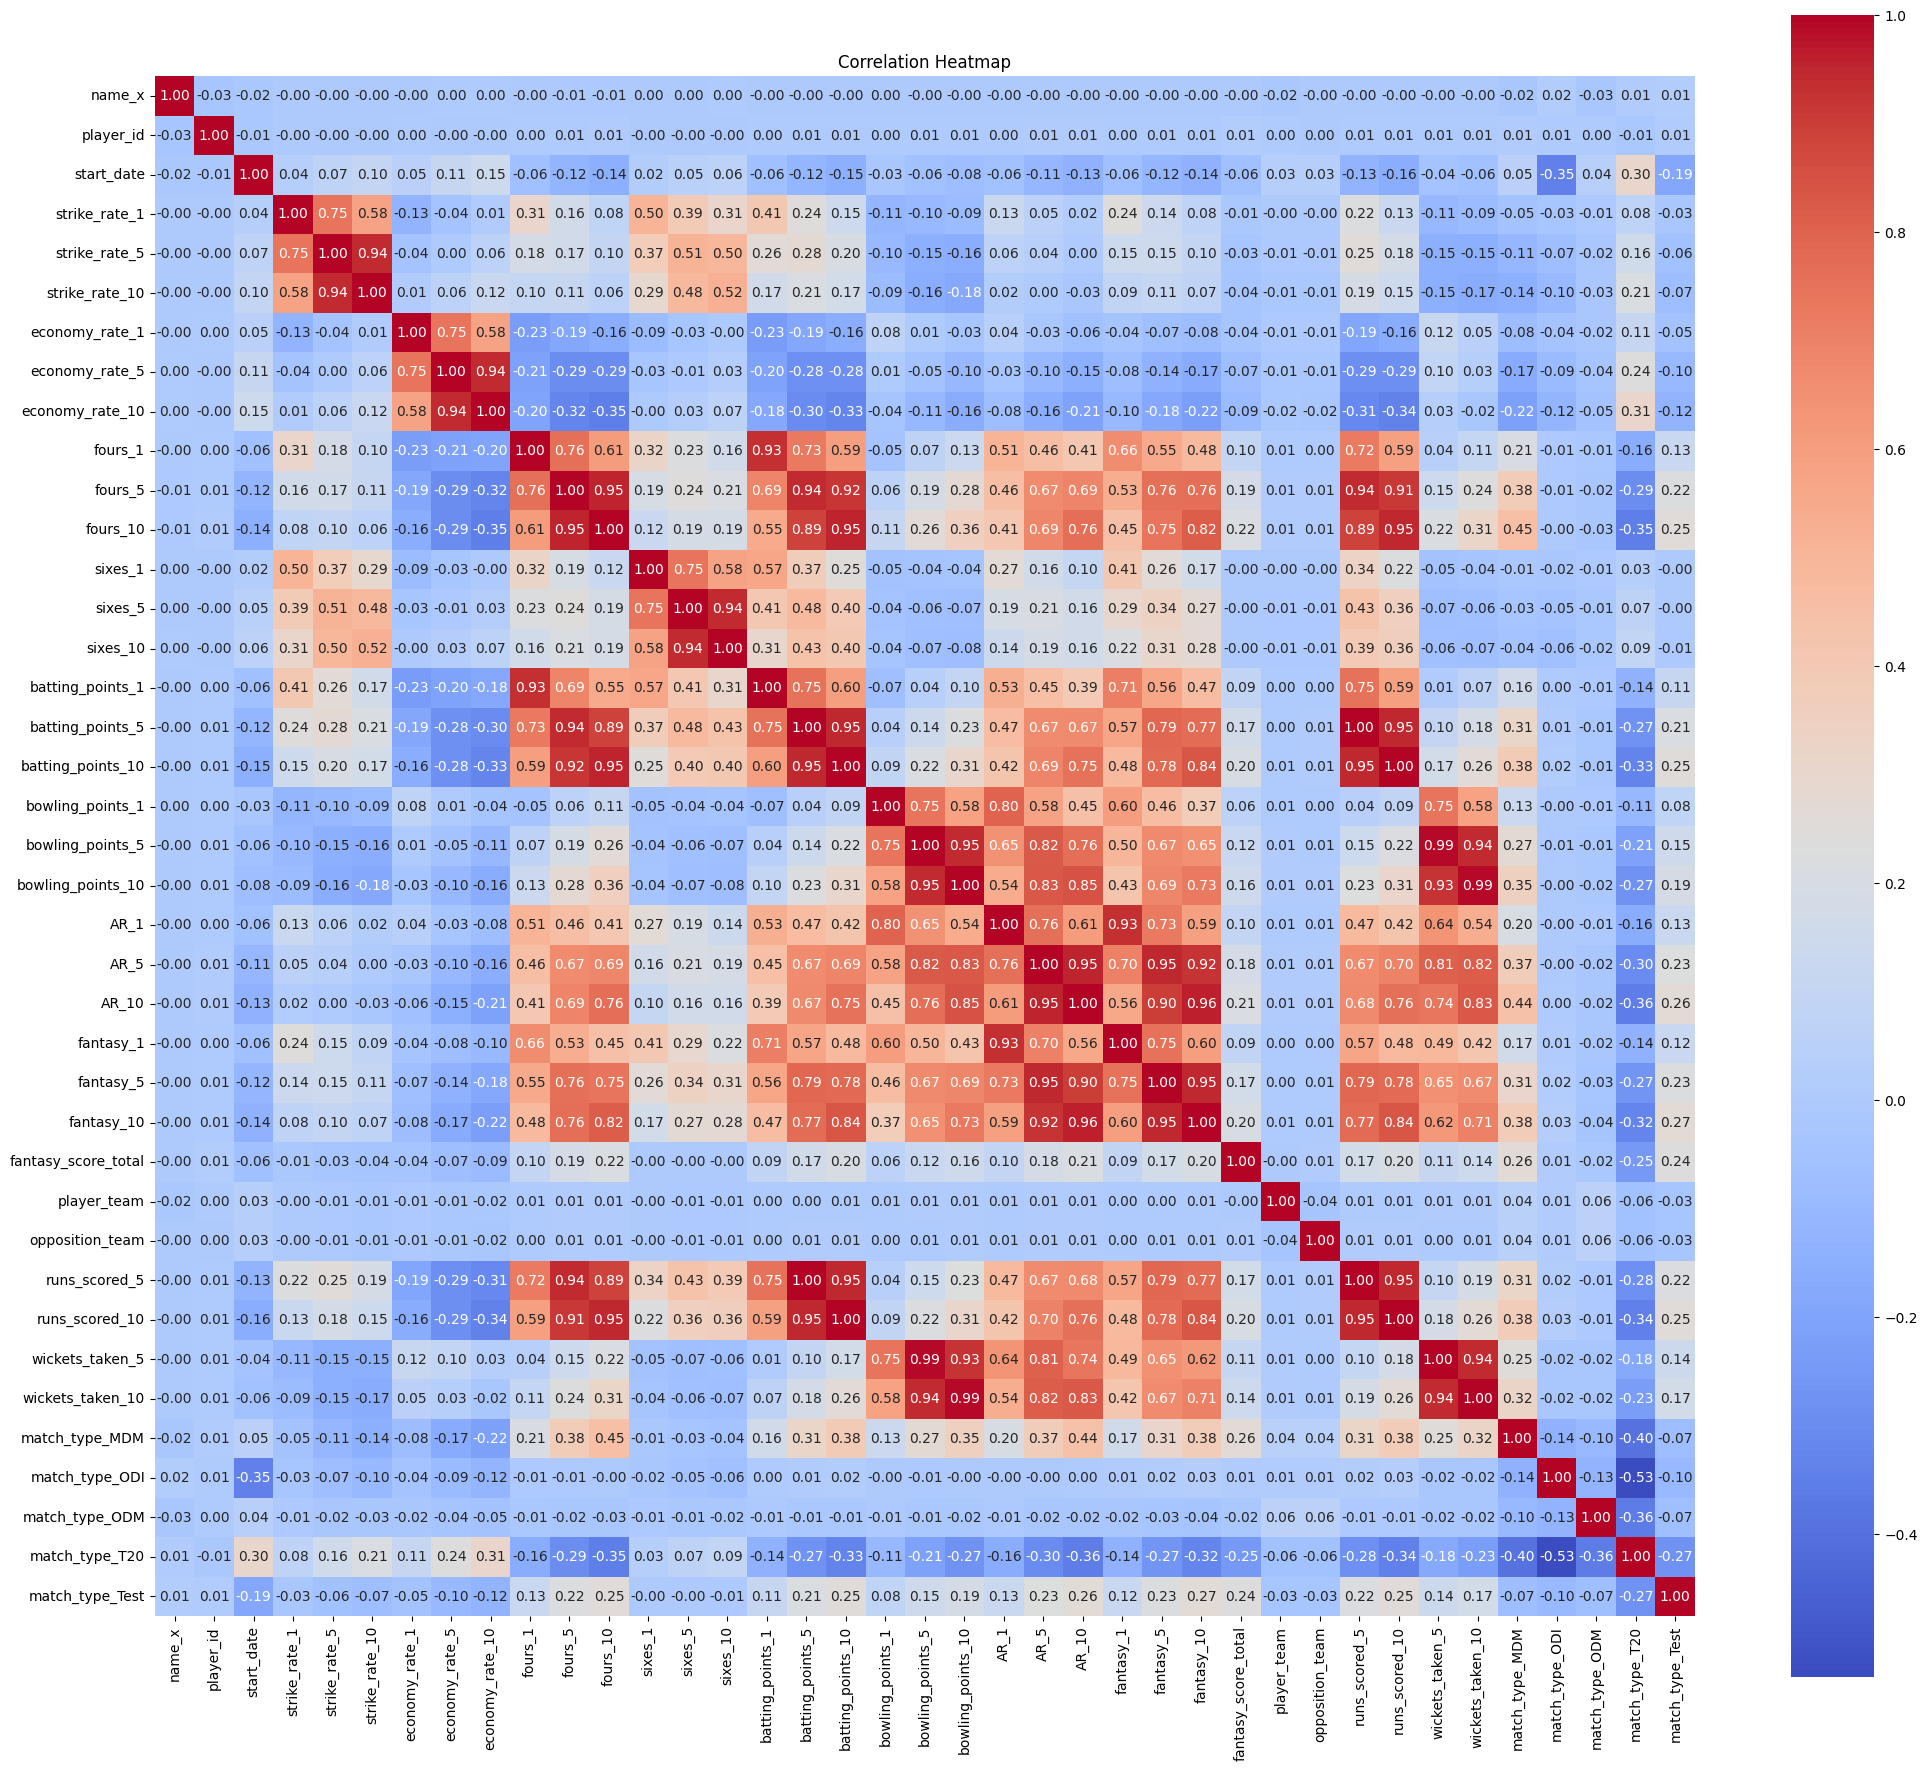

In [281]:
#Compute correlation matrix
corr_matrix = df_train_features.corr()

# 3. Plot heatmap
plt.figure(figsize=(21, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [282]:
df.head(5)


,player_id,match_id,gender,balls_per_over,start_date,series_name,name_x,runs_scored,player_out,balls_faced,...,fantasy_score_total,all_rounder_score,fielding,impact,impact2,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test
0,922,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,6156,10,1,30.0,...,17,2.222222,5,-1.944444,0.0,0,0,0,1,0
1,922,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,6156,8,1,18.0,...,7,1.777778,0,-0.833333,0.0,0,0,0,1,0
2,922,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,6156,1,0,5.0,...,5,0.222222,0,-0.444444,0.0,0,0,0,1,0
3,922,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,6156,0,0,NaN,...,4,0.000000,0,0.000000,0.0,0,0,0,1,0
4,922,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,6156,1,1,15.0,...,-1,0.222222,0,-1.555556,0.0,0,0,0,1,0


In [283]:
X_train = df_train_features.drop(['fantasy_score_total', 'start_date'], axis = 1)
y_train = df_train_features['fantasy_score_total']

X_test = df_test_features.drop(['fantasy_score_total', 'start_date'], axis = 1)
y_test = df_test_features['fantasy_score_total']

In [284]:
X_train 


,name_x,player_id,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,fours_1,fours_5,...,opposition_team,runs_scored_5,runs_scored_10,wickets_taken_5,wickets_taken_10,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test
0,183,526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,92,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1
20,6528,10066,0.000000,31.533748,36.809687,0.000000,1.073509,1.234888,0.0,4.539325,...,130,34.995846,34.797134,0.018340,0.167194,0,0,0,0,1
19,8627,9624,46.376812,47.300622,44.989617,0.000000,1.610263,1.509307,8.0,6.808988,...,130,52.493769,42.529831,0.027510,0.204348,0,0,0,0,1
18,6655,5034,45.454545,47.762528,44.681352,6.333333,2.415394,1.844709,13.0,6.213482,...,130,46.740653,37.758682,0.041264,0.249759,0,0,0,0,1
17,9767,9676,39.534884,48.916519,44.509531,0.000000,0.456425,0.847237,1.0,2.820222,...,92,25.110980,26.149501,0.061897,0.305261,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387945,4099,5552,178.571429,102.108100,87.237278,0.000000,4.599177,5.190491,1.0,1.043947,...,270,18.269530,16.103634,0.148702,0.322685,0,0,0,1,0
387944,4099,5552,70.000000,63.876436,66.940800,2.500000,6.898766,6.343934,1.0,1.065921,...,270,14.904296,14.126664,0.223053,0.394393,0,0,0,1,0
387943,5631,1881,61.538462,60.814655,66.260978,8.000000,9.098148,7.198141,2.0,1.098882,...,270,15.356444,14.154811,0.334580,0.482036,0,0,0,1,0
387963,4936,4311,142.857143,82.899819,70.323376,0.000000,1.923143,2.564229,1.0,0.865718,...,334,7.590681,7.285484,0.374538,0.486145,0,0,0,1,0
